In [6]:
# Keanu J. Ammons
# Modified on: 6/9/2022


# Keanu J. Ammons preliminary study
# This code is a prelimary analysis of a parallel computing problem.

# Problem statement is as follows:

# Find the sum of all the even-valued terms in the Fibonacci sequence
# which do not exceed four million.

# This inital case problem is easily scaled up or down to increase or decrease the task length and/or computation time of an
# algorithim. For these reasons, this case problem makes a good inital situation to study.

# The correct answer is 4613732 

In [7]:
# External imports:
# Note that "pip install pyRAPL" and "pip install pymongo" is required for this preliminary study
# "pip install py-cpuinfo==5.0.0" may be necessary when "pip intsall cpuinfo" does not work
import numpy as np
import cpuinfo
import psutil
import platform
import pandas as pd

# this import allows functions and commands to be executed simultaneously
# this will be useful to ensure timing sequences are started independed of the FibbSolver function
# from multiprocessing import Process

In [8]:
# SINGLE CORE COMPUTATION
time_list = []
cpu_percentage = []
j = 0

# Define the inital parameters for the python function

In [9]:
# A basic function that performs the test for a specified number of times.

def FibbSolver(TestCount):
    # This while loop is implmented so that the fibb probelm is solved for a certain number of times
    # This was added so that a significant cpu % percantge will be generated (to generate data for the single node case)
    i = 0
    while i < TestCount:
        
        # for some reason, import time would not work unless it was in the same cell as the 
        import time
        # SINGLE CORE COMPUTATION
        # Set a timer in milseconds to record the time 
        start_time_miliseconds = round(time.time()* 1000)
        fibo_even  = [2]
        num1 = 1
        num2 = 2
        sumNum = num1 + num2
        
        # document cpu usage information.
        # The entire loop will not be complete until a continious data stream of all of the cpu data is gathered
        x = psutil.cpu_percent(interval=.25, percpu=False)
        cpu_percentage.append(x)
        
        while sumNum < 4000001:
            
            # Sum the two numbers in the sequence
            sumNum = num1 + num2
            
            # Directly update the two numbers
            num1 = num2
            num2 = sumNum
            
            # Check and see if your current number is odd or even. if even, append to a list
            if sumNum % 2 == 0:
                fibo_even.append(sumNum)
                
        # print and sum the final list for the sake of data analysis
        #print("   --- %s is the sum ---" % sum(fibo_even))
        #print("")
        #print("Computation time is listed below: ")
        #print("")
        
        # absolute value is used to ensure all delta time values are positive
        time = abs(time.time() * 1000 - start_time_miliseconds)
        
        #optiol print statement
        #print(" --- %s miliseconds ---" % time)
        
        time_list.append(time)
        i = i + 1

In [10]:
# Conduct a basic test and compute the power behavior of the system
TestCount = 100
i = 0
time_list = []
cpu_percentage = []

FibbSolver(TestCount)

# print to the terminal (so the programmer knows what is going on ;)   )
print("")
print("These are the computation times for each item in ms:")
print(time_list)
arr1 = np.array(time_list)

# Perform some preliminary data analysis. Reminder that the time is in miliseconds
TotalCompTime = arr1.sum()
AverageCompTime = arr1.mean()
print(len(arr1))

print("")
print("This is the compliation TEST in ms:")
print(TotalCompTime)

# provide some basic analytical data for the process
# print("These are the cpu percentages for the entire operation at each interval.")
# true_cpu_percentage = list(filter(lambda element: element != 0,cpu_percentage))
# print(true_cpu_percentage)
# print(len(true_cpu_percentage))

print("")
print("This is the cpu usage for each TEST:")
print(cpu_percentage)


These are the computation times for each item in ms:
[253.866455078125, 252.23583984375, 259.535888671875, 258.17724609375, 256.47900390625, 261.71533203125, 258.32080078125, 258.541015625, 257.44189453125, 261.7353515625, 261.67236328125, 253.904296875, 257.18408203125, 262.250244140625, 260.098388671875, 257.3427734375, 259.35791015625, 263.603271484375, 259.155517578125, 251.02978515625, 265.18798828125, 260.780029296875, 258.494140625, 260.5947265625, 256.599853515625, 256.52099609375, 260.02490234375, 256.973876953125, 253.32373046875, 256.05908203125, 256.276123046875, 259.10595703125, 255.66552734375, 254.099365234375, 259.118896484375, 257.5498046875, 263.359375, 259.208740234375, 257.408203125, 257.3388671875, 256.5517578125, 256.21142578125, 259.102294921875, 255.8251953125, 257.043212890625, 257.9736328125, 257.631103515625, 255.830322265625, 252.538818359375, 251.2119140625, 256.02587890625, 256.672119140625, 259.509765625, 258.4775390625, 257.96240234375, 257.82763671875,

In [11]:
# true_cpu_percentage = list(filter(lambda element: element != 0,cpu_percentage))
# print(true_cpu_percentage)

# Originally, the array was 3121 elements in length with mostly zeros. Therefore, I reasoned that multiple cpu_measurements 
# were being taken in between each sucessive computation. Since the cpu must be in operation for all moments
# in the computation, I wrote a filter expression that dropped all zero elemnets of the array and printed result.

# To further justify this decision, the following is a direct excerpt from the psuitil documentation:
# the first time this function is called with 
# interval = 0.0 or None it will return a meaningless 0.0 value which you are supposed to ignore.

In [12]:
print(len(cpu_percentage))

100


In [13]:
print(len(time_list))

100


In [48]:
# Prepare the jupyter workspace for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

In [20]:
df = pd.DataFrame({'Computation Time ms':time_list,'CPU % Usage':cpu_percentage})
df.index.name='Test Number'
df

,Computation Time ms,CPU % Usage
Test Number,,
0,253.866455,13.2
1,252.235840,16.3
2,259.535889,14.0
3,258.177246,11.5
4,256.479004,12.5
...,...,...
95,263.250977,14.0
96,266.683838,15.3
97,257.535645,12.5


In [70]:
np.linspace(0,99,100)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
       65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., 85., 86., 87., 88., 89., 90.,
       91., 92., 93., 94., 95., 96., 97., 98., 99.])

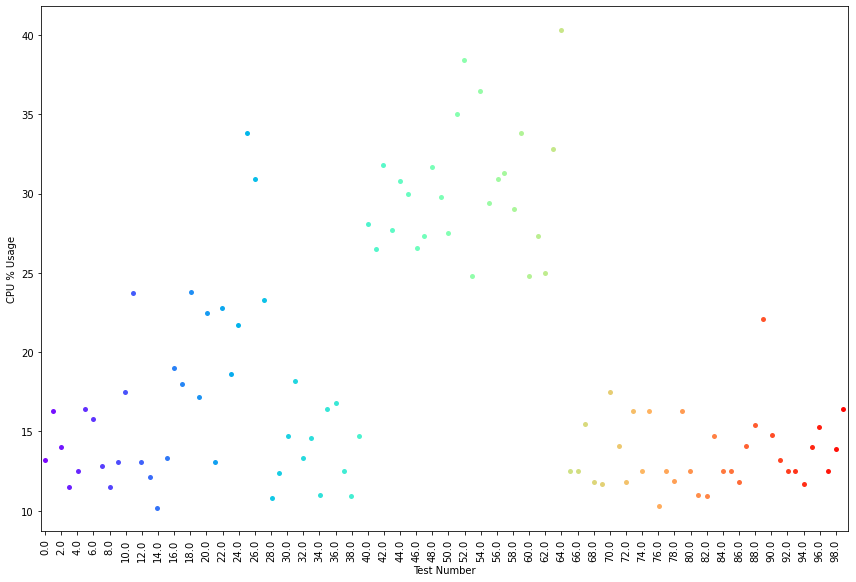

In [87]:
# plot the results of the inital test:

fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(12, 8)

# Making a jittered striplot
axis1 = np.linspace(0,99,100)
ax = sns.stripplot(x=axis1, y="CPU % Usage", data=df,palette='rainbow', jitter=True)
ax.set_xticklabels(axis1,rotation=90)
plt.tight_layout()
plt.xlabel("Test Number")

# Space out the ticks appropriately
# This was pulled from stack overflow
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)
        
# Display the final result
plt.show()


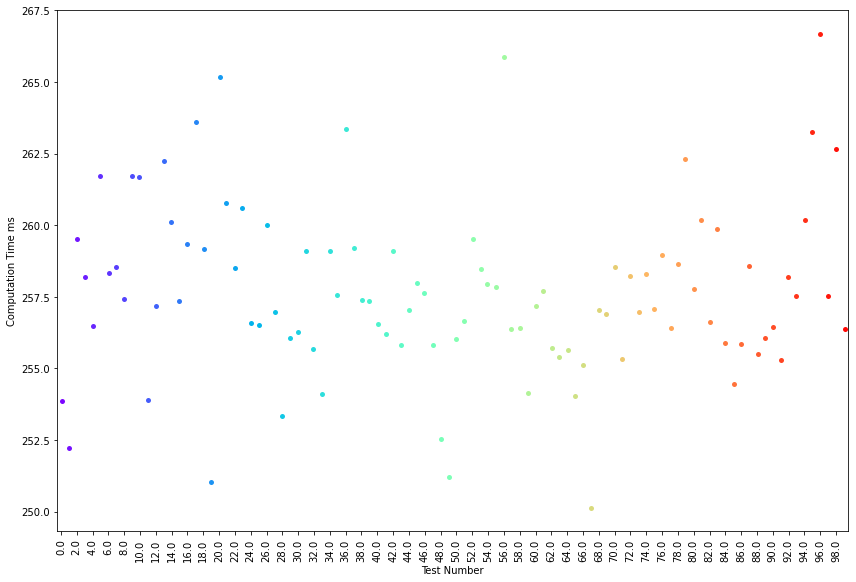

In [88]:
# plot the results of the inital test:

fig = plt.gcf()

# Changing Seaborn Plot size
fig.set_size_inches(12, 8)

# Making a jittered striplot
ax2 = sns.stripplot(x=axis1, y="Computation Time ms", data=df,palette='rainbow', jitter=True)
ax2.set_xticklabels(axis1,rotation=90)
plt.tight_layout()
plt.xlabel("Test Number")

# Space out the ticks appropriately
# This was pulled from stack overflow
xticks1=ax2.xaxis.get_major_ticks()
for j in range(len(xticks1)):
    if j%2==1:
        xticks1[j].set_visible(False)

# Display the final result
plt.show()
